In [13]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

In [14]:
uncorrected = np.load("./dash_uncorrected.npy")
corrected = np.load("./dash_corrected.npy")

In [15]:
xlows = [675, 1660, 2350, 800, 1750, 2880, 500, 1750, 2400]
xhighs = [775, 1760, 2450, 900, 1850, 2980, 600, 1850, 2500]
ylows = [1700, 1720, 1650, 1075, 950, 940, 270, 275, 250]
yhighs = [1800, 1820, 1750, 1175, 1050, 1040, 370, 375, 350]

In [16]:
median, std = np.median(uncorrected), np.std(uncorrected)
# corrected = np.log10(np.clip(corrected - median + std, 0, None))
# uncorrected = np.log10(np.clip(uncorrected - median + std, 0, None))
corrected = np.power(corrected - median + std, 2.2)
uncorrected = np.power(uncorrected - median + std, 2.2)

<ipython-input-16-2d5f06b0001e>:4: RuntimeWarning: invalid value encountered in power
  corrected = np.power(corrected - median + std, 2.2)


In [17]:
import matplotlib.colors as clr

a = np.linspace(0, 1, 1000)
r = np.sqrt(a)
g = a
b = np.square(a)
colors = np.stack([r, g, b], axis=-1)
custom = clr.ListedColormap(colors)

<IPython.core.display.Javascript object>


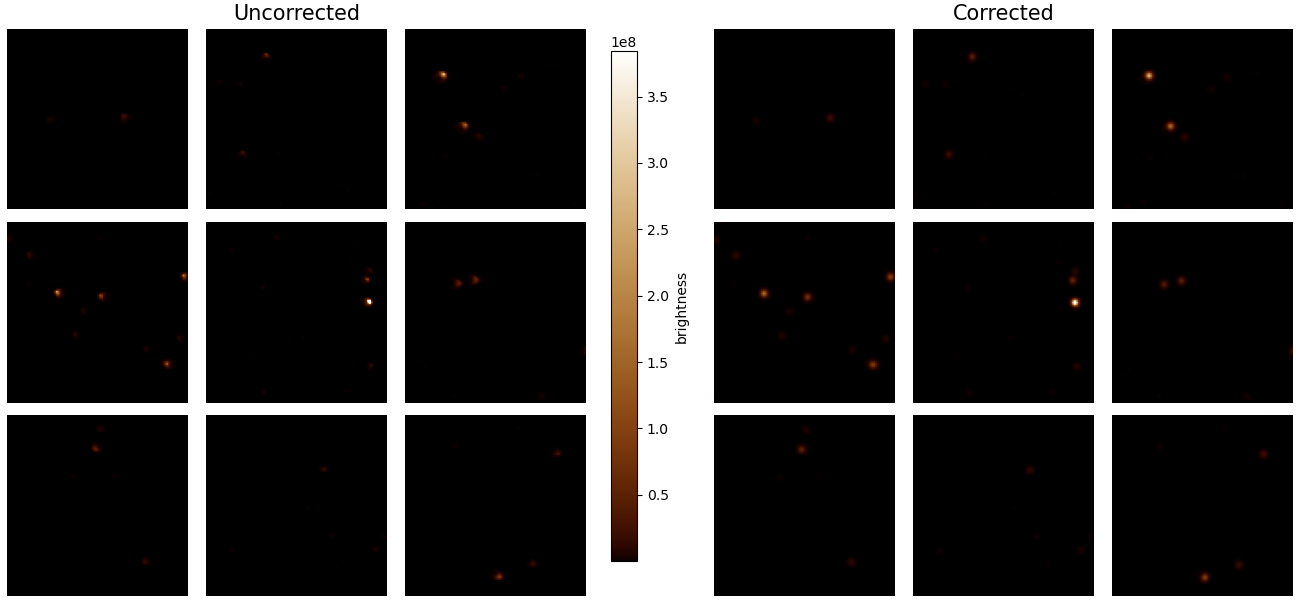

In [22]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import itertools
import matplotlib.pylab as pylab
params = {'axes.titlesize': 15}
pylab.rcParams.update(params)

#vmin, vmax = np.log10(std), 0.8*np.max(uncorrected)
vmin, vmax = np.power(std, 2.2), 0.01*np.max(uncorrected)

fig = plt.figure(constrained_layout=True, figsize=(13, 6))

gs = GridSpec(3, 7, figure=fig, 
              width_ratios=[1, 1, 1, 0.5, 1, 1, 1],
              height_ratios=[1]*3)

uncorrected_axs = dict()
for i, j in itertools.product(range(3), range(3)):
    uncorrected_axs[i, j] = fig.add_subplot(gs[i, j])
for i, (xlow, xhigh, ylow, yhigh) in enumerate(zip(xlows, xhighs, ylows, yhighs)):
    row, col = i // 3, i % 3
    im = uncorrected_axs[row, col].imshow(uncorrected[ylow:yhigh, xlow:xhigh], 
                                     vmin=vmin, vmax=vmax, origin='lower', cmap=custom)
    uncorrected_axs[row, col].set_axis_off()
    uncorrected_axs[row, col].set_aspect(1)
    
cax = fig.add_axes([0.47, 0.065, 0.02, 0.85])
#fig.colorbar(im, cax=cax, orientation='vertical', label='log$_{10}$(brightness)')
fig.colorbar(im, cax=cax, orientation='vertical', label='brightness')


corrected_axs = dict()
for i, j in itertools.product(range(3), range(3)):
    corrected_axs[i, j] = fig.add_subplot(gs[i, j+4])
for i, (xlow, xhigh, ylow, yhigh) in enumerate(zip(xlows, xhighs, ylows, yhighs)):
    row, col = i // 3, i % 3
    im = corrected_axs[row, col].imshow(corrected[ylow:yhigh, xlow:xhigh], 
                                     vmin=vmin, vmax=vmax, origin='lower', cmap=custom)
    corrected_axs[row, col].set_axis_off()
    corrected_axs[row, col].set_aspect(1)

    
uncorrected_axs[0, 1].set_title("Uncorrected")
corrected_axs[0, 1].set_title("Corrected")
plt.show()
#fig.savefig("dash.png")
fig.savefig("dash_gamma.png")

In [19]:
vmin

167996.42812482154

In [20]:
vmax

30746100894.471493